### Import Libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**The data that we are going to use for this algorithm is downloaded by NSEpy API. For training our algorithm, we will be using the SBI stock prices from 1st January 2015 to 31st December 2018. For the sake of prediction, we will use the SBI stock prices for the month of January 2019**

In [80]:
from datetime import date
from nsepy import get_history
sbin = get_history(symbol='SBIN',
                   start=date(2015,1,1),
                   end=date(2018,12,31))

In [81]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.00,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.60,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.80,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.90,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.40,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743
2015-01-08,SBIN,EQ,300.15,305.00,306.50,302.35,305.25,304.85,304.55,8939749,2.722593e+14,85776,3656015,0.4090
2015-01-09,SBIN,EQ,304.85,306.70,307.85,302.00,303.00,303.20,304.45,11953948,3.639361e+14,86383,4412814,0.3692
2015-01-12,SBIN,EQ,303.20,304.15,307.80,301.10,306.90,307.10,305.86,8536142,2.610906e+14,71620,3737137,0.4378
2015-01-13,SBIN,EQ,307.10,308.15,310.75,304.15,305.25,305.10,308.22,9484804,2.923406e+14,94825,4149653,0.4375


**Make a dataframe from the above fetched data**

In [82]:
sbin.to_csv('SBI.csv')

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [84]:
sbi_data_raw = pd.read_csv('SBI.csv')

**Now we are only interested in the closing price of the stock. Therefore, we will filter all the data from our training set and will retain only the values for the Close column**

In [85]:
sbi_data = sbi_data_raw.iloc[:, 7:8].values


In [86]:
sbi_data

array([[314.  ],
       [315.6 ],
       [312.8 ],
       [299.9 ],
       [301.4 ],
       [305.25],
       [303.  ],
       [306.9 ],
       [305.25],
       [305.  ],
       [318.4 ],
       [315.25],
       [313.2 ],
       [318.  ],
       [326.  ],
       [325.2 ],
       [327.05],
       [331.45],
       [333.4 ],
       [326.45],
       [309.3 ],
       [308.5 ],
       [299.65],
       [292.55],
       [290.5 ],
       [291.2 ],
       [279.5 ],
       [289.75],
       [286.2 ],
       [286.1 ],
       [307.7 ],
       [306.5 ],
       [305.65],
       [300.5 ],
       [302.2 ],
       [295.  ],
       [296.3 ],
       [295.45],
       [289.4 ],
       [300.25],
       [302.  ],
       [301.6 ],
       [302.8 ],
       [292.75],
       [293.6 ],
       [290.35],
       [288.5 ],
       [285.45],
       [286.7 ],
       [281.  ],
       [282.1 ],
       [283.5 ],
       [286.7 ],
       [281.2 ],
       [277.85],
       [274.6 ],
       [271.2 ],
       [265.3 ],
       [258.15

**We will use MinMaxScaler to scale our data between 0 and 1**

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

sbi = scaler.fit_transform(sbi_data)

**Now we are going to predict the closing stock price of the data based on the closing stock prices for the past 60 days**

In [88]:
features_set = []
labels = []
for i in range(60, 988):
    features_set.append(sbi[i-60:i, 0])
    labels.append(sbi[i, 0])

**There are 988 records in the training data. We execute a loop that starts from 61st record and stores all the previous 60 records to the feature_set list. The 61st record is stored in the labels list**

**We need to convert both the feature_set and the labels list to the numpy array before we can use it for training**

In [89]:
features_set, labels = np.array(features_set), np.array(labels)

**In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format. The first dimension is the number of records or rows in the dataset which is 988 in our case. The second dimension is the number of time steps which is 60 while the last dimension is the number of indicators. Since we are only using one feature, i.e Close, the number of indicators will be one**

In [90]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

**We will add four LSTM layers to our model followed by a dense layer that predicts the future stock price**

**Instantiate the Sequential class**

In [91]:
model = Sequential()

### Creating LSTM and Dropout Layers

In [92]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [93]:
model.add(Dropout(0.2))

### Adding 3 more LSTM Layers

In [94]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

**To make our model more robust, we add a dense layer at the end of the model**

In [95]:
model.add(Dense(units = 1))

**We use the mean squared error as loss function and to reduce the loss or to optimize the algorithm, we use the adam optimizer**

In [96]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Algorithm Training

In [97]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
928/928 [==============================] - 6s 6ms/step - loss: 0.0575
Epoch 2/100
928/928 [==============================] - 3s 3ms/step - loss: 0.0142
Epoch 3/100
928/928 [==============================] - 4s 4ms/step - loss: 0.0124
Epoch 4/100
928/928 [==============================] - 6s 7ms/step - loss: 0.0110
Epoch 5/100
928/928 [==============================] - 4s 5ms/step - loss: 0.0105
Epoch 6/100
928/928 [==============================] - 4s 4ms/step - loss: 0.0093
Epoch 7/100
928/928 [==============================] - 3s 4ms/step - loss: 0.0092
Epoch 8/100
928/928 [==============================] - 3s 4ms/step - loss: 0.0087
Epoch 9/100
928/928 [==============================] - 5s 5ms/step - loss: 0.0083
Epoch 10/100
928/928 [==============================] - 8s 8ms/step - loss: 0.0081
Epoch 11/100
928/928 [==============================] - 3s 4ms/step - loss: 0.0094
Epoch 12/100
928/928 [==========================

928/928 [==============================] - 8s 9ms/step - loss: 0.0021
Epoch 97/100
928/928 [==============================] - 3s 4ms/step - loss: 0.0023
Epoch 98/100
928/928 [==============================] - 4s 4ms/step - loss: 0.0023
Epoch 99/100
928/928 [==============================] - 3s 4ms/step - loss: 0.0023
Epoch 100/100
928/928 [==============================] - 7s 7ms/step - loss: 0.0022


## Testing our LSTM

**We have successfully trained our LSTM, now is the time to test the performance of our algorithm on the test set by predicting the closing stock prices for the month of January 2019**

**Again we will use NSEpy API to fetch data and then store it in as a dataframe**

In [121]:
from datetime import date
from nsepy import get_history
sbin = get_history(symbol='SBIN',
                   start=date(2019,1,1),
                   end=date(2019,1,30))

In [122]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,SBIN,EQ,295.90,297.50,300.70,293.85,300.70,299.60,296.77,11837127,3.512877e+14,69723,1668134,0.1409
2019-01-02,SBIN,EQ,299.60,299.10,302.50,293.10,293.80,293.90,298.20,25559853,7.622010e+14,162196,7019907,0.2746
2019-01-03,SBIN,EQ,293.90,295.00,295.55,290.10,291.05,291.10,292.87,17548347,5.139324e+14,110626,6361787,0.3625
2019-01-04,SBIN,EQ,291.10,292.10,299.00,291.50,297.30,297.65,296.18,19514041,5.779686e+14,142962,4963982,0.2544
2019-01-07,SBIN,EQ,297.65,301.05,301.50,295.20,296.55,296.30,298.25,14579399,4.348321e+14,113554,4817960,0.3305
2019-01-08,SBIN,EQ,296.30,295.80,306.00,294.75,305.50,305.30,301.96,22949961,6.929908e+14,161941,8532454,0.3718
2019-01-09,SBIN,EQ,305.30,306.00,307.10,300.75,304.75,305.30,304.37,21109911,6.425242e+14,153567,5956634,0.2822
2019-01-10,SBIN,EQ,305.30,305.10,307.50,303.50,305.40,305.55,305.60,16295468,4.979912e+14,105369,3670150,0.2252
2019-01-11,SBIN,EQ,305.55,305.40,306.20,300.95,301.65,302.75,303.57,12702551,3.856075e+14,113356,4877179,0.3840


In [125]:
sbin.to_csv('sbi_test.csv')

In [127]:
sbi_test_raw = pd.read_csv('sbi_test.csv')

In [128]:
sbi_test = sbi_test_raw.iloc[:, 7:8].values

**For each day of January 2019, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing**

In [130]:
sbi_total = pd.concat((sbi_data_raw['Close'], sbi_test_raw['Close']), axis=0)

In [131]:
sbi_total

0      314.00
1      315.25
2      312.75
3      299.90
4      300.15
5      304.85
6      303.20
7      307.10
8      305.10
9      304.70
10     320.30
11     315.45
12     313.15
13     318.15
14     326.20
15     324.65
16     327.45
17     330.05
18     334.60
19     327.00
20     308.95
21     307.50
22     300.30
23     293.05
24     290.80
25     290.30
26     279.50
27     287.30
28     285.95
29     284.30
        ...  
981    300.70
982    294.05
983    291.90
984    293.05
985    294.15
986    292.15
987    294.80
988    295.90
0      299.60
1      293.90
2      291.10
3      297.65
4      296.30
5      305.30
6      305.30
7      305.55
8      302.75
9      300.40
10     301.65
11     303.15
12     297.40
13     294.95
14     292.45
15     290.25
16     286.65
17     288.05
18     285.40
19     281.60
20     280.60
21     287.45
Name: Close, Length: 1011, dtype: float64

**The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2019 and the 60 stock prices from the last 60 days for the training set**

In [132]:
test_inputs = sbi_total[len(sbi_total) - len(sbi_test) - 60:].values

**As we did for the training set, we need to scale our test data**

In [133]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

**Let's prepare our final test input set that will contain previous 60 stock prices for the month of January**

In [134]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

**Now we need to convert our data into the three-dimensional format which can be used as input to the LSTM**

In [135]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

## Making Predictions

In [136]:
predictions = model.predict(test_features)

**Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values**

In [137]:
predictions = scaler.inverse_transform(predictions)

## Plotting the predictions

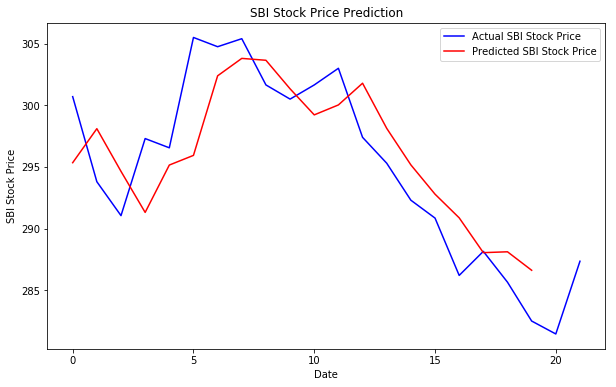

In [138]:
plt.figure(figsize=(10,6))
plt.plot(sbi_test, color='blue', label='Actual SBI Stock Price')
plt.plot(predictions , color='red', label='Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

### Hence we conclude that LSTM model is more effective than Regression Models in the case of Stock Market Prediction